# Simulation of stochastic process

We here try to compute several trajectories for a processus defined by :

$$ \mathrm{d}S_t = \mu(t, S_t)\mathrm{d}t + \sigma(t, S_t)\mathrm{d}W_t$$

Where $\mu : [0, +\infty[ \times \mathbb{R} \rightarrow \mathbb{R}$ and $\sigma : [0, +\infty[ \times \mathbb{R} \rightarrow \mathbb{R}$ are two functions defined by user. $(W_t)_{t \geqslant 0}$ a brownian motion.We need to fix $S_0$ the initial time and $T$ the maturity, because we are going to compute trajectories for the interval $[0, T]$.

Our goal, beyond the simulation of the stochastic process $(S_t)_{t\in\mathbb{R}}$, is to estimate the quantity :

$$\mathbb{E}\left[(S_T - K)^+\right]$$

With $K\in\mathbb{R}_+$ a strike if we consider a financial application.

We first define very simple functions for $\mu$ and $\sigma$ :

In [1]:
def mu(t, x):
    return 0.01 * x

def sigma(t, x):
    return 0.1 * x

We now define the function which will return the trajectories

In [2]:
import numpy as np


def trajectories(N_simulations, n_per_simulation, initial_value, T):
    t = np.linspace(start=0, stop=T, num=n_per_simulation+1)
    step = T / n_per_simulation
    
    S = initial_value * np.ones((n_per_simulation+1, N_simulations))
    
    for j in range(N_simulations):
        for i in range(1, n_per_simulation+1):
            S[i, j] = S[i-1, j] + mu(t[i], S[i-1, j]) * step + sigma(t[i], S[i-1, j]) * np.sqrt(step) * np.random.randn()
    
    return t, S

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

t, S = trajectories(3, 1000, 100, 3)

plt.plot(t, S)
plt.show()

Now we want to estimate the value of : 

$$\mathbb{E}\left[(S_T - K)^+\right]$$

And we will take $K=110$

Let's have a look with 5 trajectories :

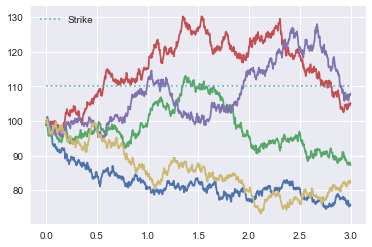

In [4]:
N_simulations=5 ; n_per_simulation=1000 ; initial_value=100 ; T=3

K = 110

t, S = trajectories(N_simulations, n_per_simulation, initial_value, T)

plt.plot(t, S)
plt.plot([0, T], [K, K], ':', label="Strike")

plt.legend()
plt.show()

Let's evaluate with Monte-Carlo method the expectation.

In [5]:
def evaluate(N_simulations, n_per_simulation, initial_value, T, K):
    t, S = trajectories(N_simulations, n_per_simulation, initial_value, T)
    
    final_values = S[n_per_simulation, :]
    f = lambda x : np.maximum(x - K, 0)
    expected = np.mean(f(final_values))
    probability = np.mean([1 if x >=K else 0 for x in final_values])
    
    print("Information for strike K={}, with {} simulations we have :".format(K, N_simulations))
    print("Expected : {} and use probability : {}.".format(expected, probability))

In [6]:
evaluate(1000, 1000, 100, 3, 120)

Information for strike K=120, with 1000 simulations we have :
Expected : 1.8058354084163621 and use probability : 0.153.


Let's have a look at how long it takes to compute 10 000 trajectories:

In [7]:
from time import time
N_simulations=10000; n_per_simulation=1000; initial_value=100; T=3

t0 = time()
t, S = trajectories(N_simulations, n_per_simulation, initial_value, T)
t1 = time()

print("It took {}s to compute {} simulations.".format(t1-t0, N_simulations))

It took 59.75374794006348s to compute 10000 simulations.
